1
1.046469666
1.09786521
1.161080292
1.123276283
1.081262376
1.250514984
1.226602354
1.307592806
1.262219894
1.193264524
1.393359136
1.410047258
[[1.        ]
 [1.04646967]
 [1.09786521]
 [1.16108029]
 [1.12327628]
 [1.08126238]
 [1.25051498]
 [1.22660235]
 [1.30759281]
 [1.26221989]
 [1.19326452]
 [1.39335914]
 [1.41004726]]
[1.]


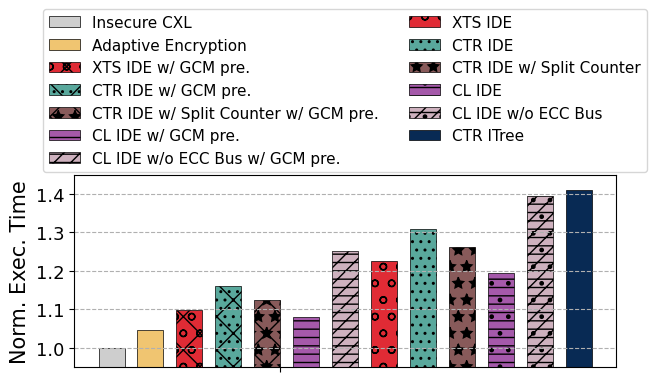

In [82]:
import numpy as np    
import matplotlib.pyplot as plt    
import openpyxl
import itertools
#bar patterns
patterns = [ "/" , "\\" , "|" , "-" , "+" , "x", "o", "O", ".", "*" ]

N=1
x=np.arange(N) 
xclicks=''
xlabels=''
ylabels='Norm. Exec. Time'
wb = openpyxl.load_workbook(filename="ablation.xlsx")
ws = wb['Sheet1']

b1=np.array([])

for col in ws.iter_cols(min_row=2,min_col=2,values_only=True):
    for value in col:
        # 获取单元格数据
        b1=np.append(b1,value)     
        print(value)            
b1=b1.reshape(13, 1)
print(b1)


allfigsize=(7,2.5)     
width=0.01
plt.figure(figsize=allfigsize)

i = (lambda c: lambda: next(c))(itertools.count(0))
j = (lambda c: lambda: next(c))((itertools.count(0)))
k = (lambda c: lambda: next(c))((itertools.count(0)))

print(b1[0])
# plt.bar(x - width*1, b1[0], width, label='w Pre. GCM & Adapt. Encryption', color='#f0c571',hatch="//", edgecolor='black', linewidth=0.5) 
# plt.bar(x , b1[1], width, label='w/o Pre. GCM', color='#a559aa', hatch="x", edgecolor='black', linewidth=0.5)
# plt.bar(x + width*1, b1[2], width, label='w/o Adapt. Encryption',color='#59a89c', hatch="." , edgecolor='black', linewidth=0.5)
off = 0
wid = 0.5
plt.bar(x + width*(j() - off -wid *  (13-k())), b1[i()], width, label='Insecure CXL',color='#cecece', edgecolor='black', linewidth=0.5, align='center')
plt.bar(x + width*(j() - off -wid *  (13-k())), b1[i()], width, label='Adaptive Encryption',color='#f0c571', edgecolor='black', linewidth=0.5, align='center')

plt.bar(x + width*(j() - off -wid *  (13-k())), b1[i()], width, label='XTS IDE w/ GCM pre.', color='#e02b35', hatch="xo",edgecolor='black', linewidth=0.5, align='center')
plt.bar(x + width*(j() - off -wid *  (13-k())), b1[i()], width, label='CTR IDE w/ GCM pre.', color='#59a89c',  hatch="x..", edgecolor='black', linewidth=0.5, align='center')
plt.bar(x + width*(j() - off -wid *  (13-k())), b1[i()], width, label='CTR IDE w/ Split Counter w/ GCM pre.', color='#885A5A', hatch="*x", edgecolor='black', linewidth=0.5, align='center')
plt.bar(x + width*(j() - off -wid *  (13-k())), b1[i()], width, label='CL IDE w/ GCM pre.',  color='#a559aa', hatch="--", edgecolor='black', linewidth=0.5, align='center' )
plt.bar(x + width*(j() - off -wid *  (13-k())), b1[i()], width, label='CL IDE w/o ECC Bus w/ GCM pre.', color='#CEB1BE', hatch="//--",edgecolor='black', linewidth=0.5, align='center')

plt.bar(x + width*(j() - off -wid *  (13-k())), b1[i()], width, label='XTS IDE', color='#e02b35', hatch="o",edgecolor='black', linewidth=0.5, align='center')
plt.bar(x + width*(j() - off -wid *  (13-k())), b1[i()], width, label='CTR IDE', color='#59a89c', hatch=".." , edgecolor='black', linewidth=0.5, align='center')
plt.bar(x + width*(j() - off -wid *  (13-k())), b1[i()], width, label='CTR IDE w/ Split Counter', color='#885A5A' , hatch="*", edgecolor='black', linewidth=0.5, align='center')
plt.bar(x + width*(j() - off -wid *  (13-k())), b1[i()], width, label='CL IDE',  color='#a559aa', edgecolor='black', hatch="--.",linewidth=0.5, align='center' )
plt.bar(x + width*(j() - off -wid *  (13-k())), b1[i()], width, label='CL IDE w/o ECC Bus', color='#CEB1BE',hatch="//--.", edgecolor='black', linewidth=0.5, align='center')


plt.bar(x + width*(j() - off -wid *  (13-k())), b1[i()], width, label='CTR ITree', color='#082a54', edgecolor='black', linewidth=0.5, align='center')






########################################################

########################################################

# plt.bar(x + width*(j() - off -wid *  (13-k())), b1[i()], width, label='Insecure CXL ', color='#cecece',edgecolor='black', linewidth=0.5, align='center')
# plt.bar(x + width*(j() - off -wid *  (13-k())), b1[i()], width, label='Integrity Tree ', color='#082a54', edgecolor='black', linewidth=0.5, align='center')





plt.grid(axis='y',linestyle='--')
plt.xticks(x,xclicks, fontsize=12, va='center_baseline') 
#plt.ylim(0,180000)
plt.ylim(0.95,1.45)
plt.yticks([1.0,1.1,1.2,1.3,1.4],fontsize=13)
#plt.xlabel(xlabels,fontsize=15)
plt.ylabel(ylabels,fontsize=15)    
plt.legend(loc='upper center', ncol=2, bbox_to_anchor=(0.50, 1.9), fontsize=11)    
plt.savefig('ablation.pdf',bbox_inches = 'tight')    
plt.show()